In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
%matplotlib inline

## Dataset

In [16]:
class_ref = pd.read_csv('dataset/class.csv').loc[:, ['Class_Number', 'Class_Type']]
zoo = pd.read_csv('dataset/zoo.csv').iloc[:, 1:]
zoo.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [17]:
class_ref

,Class_Number,Class_Type
0,1,Mammal
1,2,Bird
2,3,Reptile
3,4,Fish
4,5,Amphibian
5,6,Bug
6,7,Invertebrate


#### Setting the dependent and independent variables

In [18]:
zoo_X = zoo.drop('class_type', axis=1)
zoo_y = zoo.loc[:, 'class_type']

## Splitting to train and test sets

In [19]:
X_train, X_test, y_train, y_test = train_test_split(zoo_X, zoo_y, test_size=0.15)

## Initialize Logistic Regression model

In [20]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

## Initialize Decision Tree

In [21]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

**Use X_test for prediction**

In [24]:
predicted_val_log = logistic_model.predict(X_test)
predicted_val_tree = tree_model.predict(X_test)

**Since the index has been randomized, reset it**

In [25]:
X_test.reset_index(drop=True, inplace=True)

**Concatenate X_test with predicted_val to combine them into one DataFrame**

In [26]:
predicted_data_log = pd.concat((X_test, pd.Series(predicted_val_log, name='predicted')), axis=1)
predicted_data_tree = pd.concat((X_test, pd.Series(predicted_val_tree, name='predicted')), axis=1)
predicted_data_tree.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,predicted
0,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
1,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
2,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
3,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
4,0,0,1,0,0,0,0,0,0,1,0,0,6,0,0,0,6


**Replace the class number with the class type**

In [28]:
class_ref_dct = dict(zip(class_ref['Class_Number'], class_ref['Class_Type']))
predicted_data_log['predicted'].replace(class_ref_dct, inplace=True)
predicted_data_tree['predicted'].replace(class_ref_dct, inplace=True)

In [29]:
class_ref_dct

{1: 'Mammal',
 2: 'Bird',
 3: 'Reptile',
 4: 'Fish',
 5: 'Amphibian',
 6: 'Bug',
 7: 'Invertebrate'}

In [33]:
predicted_data_log.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,predicted
0,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,Mammal
1,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,Fish
2,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,Mammal
3,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,Mammal
4,0,0,1,0,0,0,0,0,0,1,0,0,6,0,0,0,Bug


In [31]:
predicted_data_tree.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,predicted
0,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,Mammal
1,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,Fish
2,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,Mammal
3,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,Mammal
4,0,0,1,0,0,0,0,0,0,1,0,0,6,0,0,0,Bug


## Bar chart

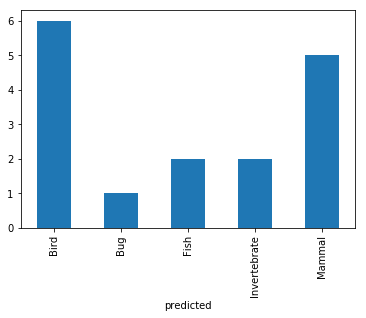

In [34]:
predicted_data_log.pivot_table(index='predicted', aggfunc='count')['backbone'].plot(kind='bar')

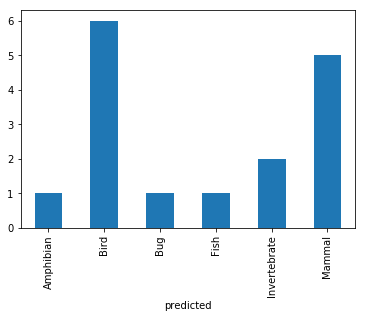

In [35]:
predicted_data_tree.pivot_table(index='predicted', aggfunc='count')['backbone'].plot(kind='bar')

## Accuracy

In [36]:
logistic_model.score(X_test, y_test)

0.9375

In [37]:
tree_model.score(X_test, y_test)

0.9375